<!DOCTYPE html>
<html>
<body>
<div align="center">
<h3>Made by Manthan A Panchal</h3>
    
<h1>Coca_Cola_Sales_Forcasting</h1>

<h3>Follow Me on - <a href="https://www.linkedin.com/in/manthan-panchal-046b3b198/">LinkedIn</a>&nbsp; 
</div>

</div>
</body>
</html>

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import plotly_express as ps 

import statsmodels.formula.api as smf

#models
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt


pd.set_option('display.max_rows', None)
plt.style.use('seaborn-darkgrid')
sns.set(rc = {'figure.figsize':(10, 5)})

In [73]:
df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


## EDA

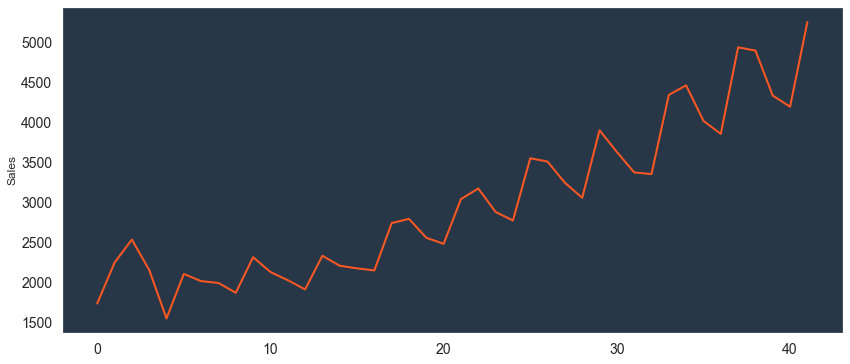

In [3]:
plt.figure(figsize=(14,6))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':14,'ytick.labelsize':14})
sns.lineplot(x = np.arange(df.shape[0]) ,y = df.Sales,data=df , color = "#FF5722" , linewidth = 2 )
plt.show()

### The Data has Seasonality with Upward Increasing Trend

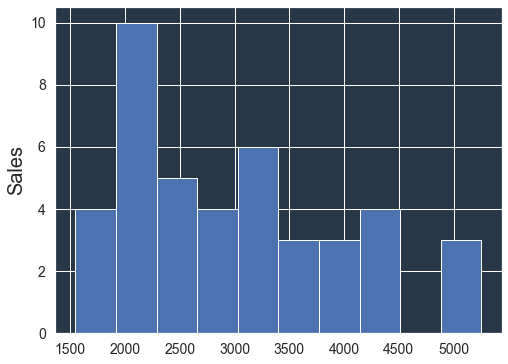

In [4]:
df.Sales.hist()
plt.ylabel('Sales', size = 20)
plt.show()

In [5]:
df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

### Data Driven Models

#### Train test spilt

In [6]:
df.shape

(42, 2)

In [111]:
train = df.head(34)
test = df.tail(8)

### Moving Average [Window]

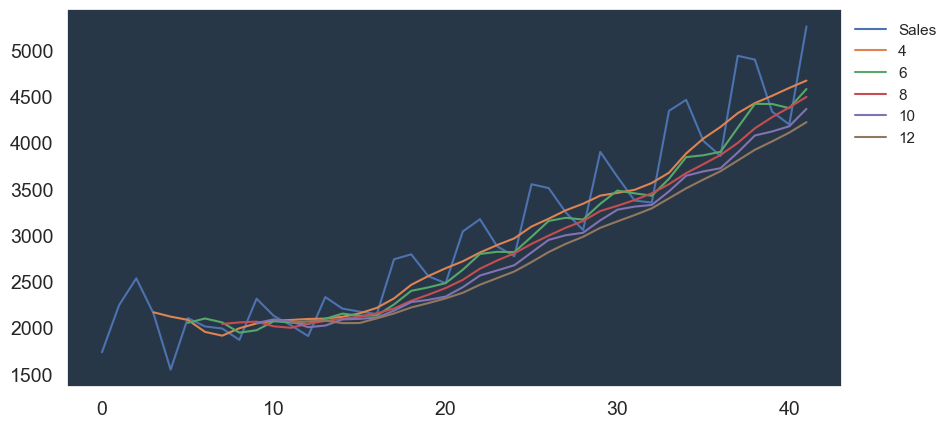

In [8]:
plt.figure(figsize=(10, 5), dpi=100)

df.Sales.plot()

window_size = [4,6,8,10,12]

for i in window_size:
    df.Sales.rolling(i).mean().plot(label = str(i))
    
plt.legend(bbox_to_anchor = (1,1))

### Decomposition

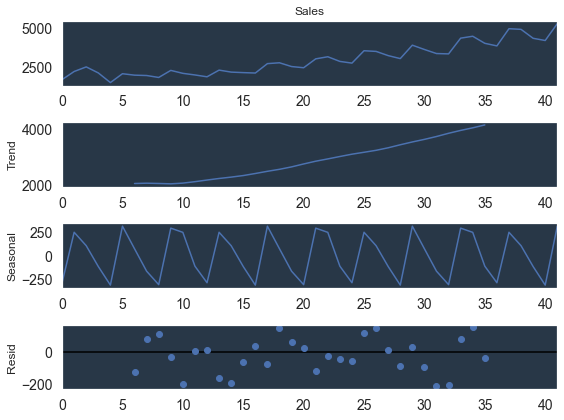

In [9]:
decompose_ts_add = seasonal_decompose(df.Sales, period=12)
decompose_ts_add.plot()
plt.show()

#### the operation gives the underlying seasonal components of the graph, variance

### ACF and PACF plots

#### to check the autocorelation with the lagged versions

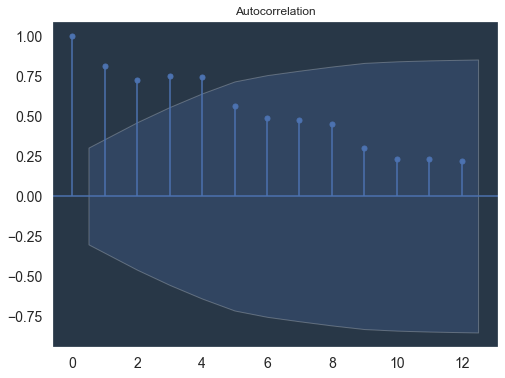

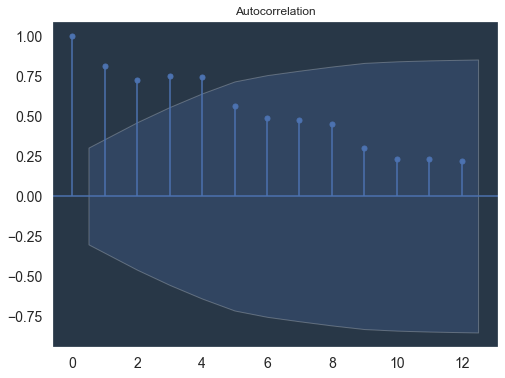

In [10]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.Sales,lags=12)

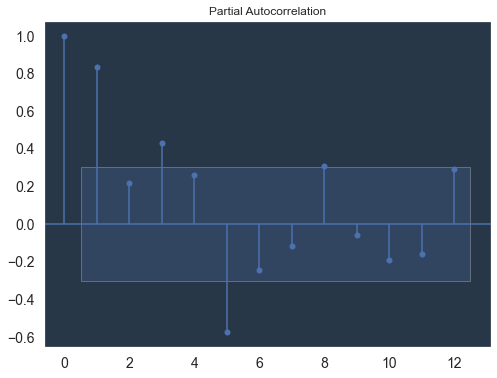

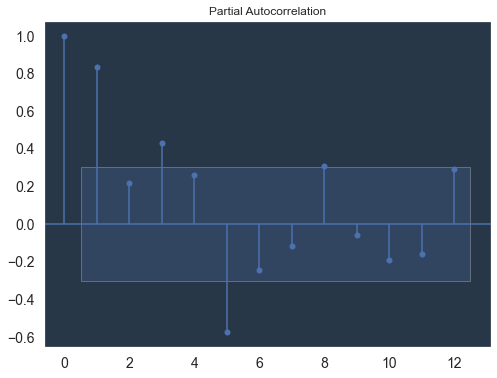

In [11]:
tsa_plots.plot_pacf(df.Sales,lags=12)

### Evaluation metric MAPE(mean absolute percentage error)

In [25]:
def MAPE(pred, org):
    temp = abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Smoothning

In [28]:
ses_model = SimpleExpSmoothing(train.Sales).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0], end = test.index[-1])
MAPE(pred_ses, test.Sales)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


20.62971720565922

### Holts Method

In [31]:
hw_model = Holt(train.Sales).fit(smoothing_level = 0.8, smoothing_slope = 0.2)
pred_hw = hw_model.predict(start= test.index[0], end = test.index[-1])
MAPE(pred_hw, test.Sales)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-31-4b335b3b2955>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(train.Sales).fit(smoothing_level = 0.8, smoothing_slope = 0.2)


10.874453714362792

### Holts winter exponential smoothing with additive seasonality and additive trend

In [32]:
hwe_model = ExponentialSmoothing(train.Sales, seasonal='add', trend ='add',
                                 seasonal_periods=12).fit()
pred_hwe_model = hw_model.predict(start = test.index[0], end = test.index[-1])

MAPE(pred_hwe_model, test.Sales)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


10.874453714362792

### Final Model on complete Data Set

In [34]:
hwe_model_add = ExponentialSmoothing(df.Sales, seasonal='add',
                                     trend = 'add', seasonal_periods=12).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [55]:
hwe_results = pd.DataFrame(hwe_model_add.forecast(43))

### Visualizing

[]

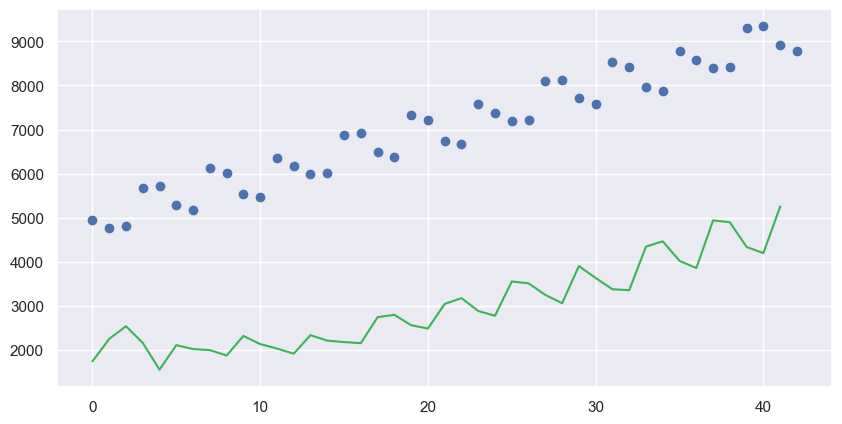

In [58]:
plt.figure(figsize=(10, 5), dpi = 100)
plt.plot(np.arange(42), df.Sales, label ='actual' ,color = '#39b556')
plt.scatter(np.arange(43), hwe_results, label = 'predicted')
plt.plot()

### Method 2

In [62]:
df.drop(['1st_difference', '3rd_difference'], axis=1, inplace =True)

In [63]:
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


### Adding t and tsquared columns

In [74]:
df['t'] = [x for x in range(1, df.shape[0]+1)]

In [75]:
df['t_squared'] = [x*x for x in df.t]

In [76]:
df.head()

,Quarter,Sales,t,t_squared
0,Q1_86,1734.827000,1,1
1,Q2_86,2244.960999,2,4
2,Q3_86,2533.804993,3,9
3,Q4_86,2154.962997,4,16
4,Q1_87,1547.818996,5,25


In [77]:
df['Quart'] = df.Quarter.str[:2]
df.head()

,Quarter,Sales,t,t_squared,Quart
0,Q1_86,1734.827000,1,1,Q1
1,Q2_86,2244.960999,2,4,Q2
2,Q3_86,2533.804993,3,9,Q3
3,Q4_86,2154.962997,4,16,Q4
4,Q1_87,1547.818996,5,25,Q1


In [81]:
Quart = [x[0] for x in df.iloc[0:4, 4:5].values]
Quart

['Q1', 'Q2', 'Q3', 'Q4']

In [83]:
dummies = pd.get_dummies(df.Quart, columns=Quart)
dummies

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,1,0,0


In [85]:
for q in Quart:
    df[q] = dummies[q]
df

,Quarter,Sales,t,t_squared,Quart,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,1,1,Q1,1,0,0,0
1,Q2_86,2244.960999,2,4,Q2,0,1,0,0
2,Q3_86,2533.804993,3,9,Q3,0,0,1,0
3,Q4_86,2154.962997,4,16,Q4,0,0,0,1
4,Q1_87,1547.818996,5,25,Q1,1,0,0,0
5,Q2_87,2104.411995,6,36,Q2,0,1,0,0
6,Q3_87,2014.362999,7,49,Q3,0,0,1,0
7,Q4_87,1991.746998,8,64,Q4,0,0,0,1
8,Q1_88,1869.049999,9,81,Q1,1,0,0,0
9,Q2_88,2313.631996,10,100,Q2,0,1,0,0


In [88]:
df['Year'] = '19' + df.Quarter.str[3:]
df.head()

,Quarter,Sales,t,t_squared,Quart,Q1,Q2,Q3,Q4,Year
0,Q1_86,1734.827000,1,1,Q1,1,0,0,0,1986
1,Q2_86,2244.960999,2,4,Q2,0,1,0,0,1986
2,Q3_86,2533.804993,3,9,Q3,0,0,1,0,1986
3,Q4_86,2154.962997,4,16,Q4,0,0,0,1,1986
4,Q1_87,1547.818996,5,25,Q1,1,0,0,0,1987


In [91]:
df['log_sales'] = np.log(df['Sales'])
df.head()

,Quarter,Sales,t,t_squared,Quart,Q1,Q2,Q3,Q4,Year,log_sales
0,Q1_86,1734.827000,1,1,Q1,1,0,0,0,1986,7.458663
1,Q2_86,2244.960999,2,4,Q2,0,1,0,0,1986,7.716443
2,Q3_86,2533.804993,3,9,Q3,0,0,1,0,1986,7.837477
3,Q4_86,2154.962997,4,16,Q4,0,0,0,1,1986,7.675529
4,Q1_87,1547.818996,5,25,Q1,1,0,0,0,1987,7.344602


### EDA

<AxesSubplot:xlabel='Quart', ylabel='Year'>

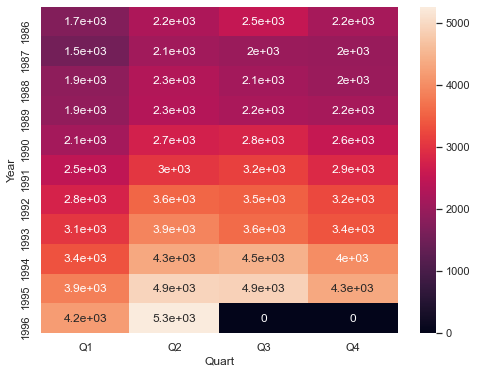

In [101]:
x = pd.pivot_table(data=df, values = 'Sales', index='Year', columns='Quart',
               aggfunc= 'mean', fill_value=0)

sns.heatmap(x, annot=True)

In [102]:
x

Quart,Q1,Q2,Q3,Q4
Year,,,,
1986,1734.827000,2244.960999,2533.804993,2154.962997
1987,1547.818996,2104.411995,2014.362999,1991.746998
1988,1869.049999,2313.631996,2128.320000,2026.828999
1989,1910.603996,2331.164993,2206.549995,2173.967995
1990,2148.278000,2739.307999,2792.753998,2556.009995
1991,2480.973999,3039.522995,3172.115997,2879.000999
1992,2772.000000,3550.000000,3508.000000,3243.859993
1993,3056.000000,3899.000000,3629.000000,3373.000000
1994,3352.000000,4342.000000,4461.000000,4017.000000


<AxesSubplot:xlabel='Year', ylabel='Sales'>

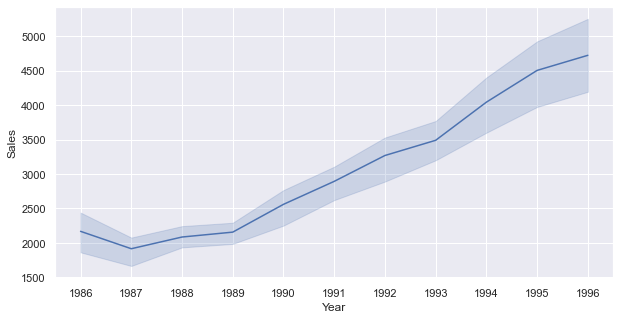

In [107]:

sns.lineplot(x='Year', y ='Sales', data = df)

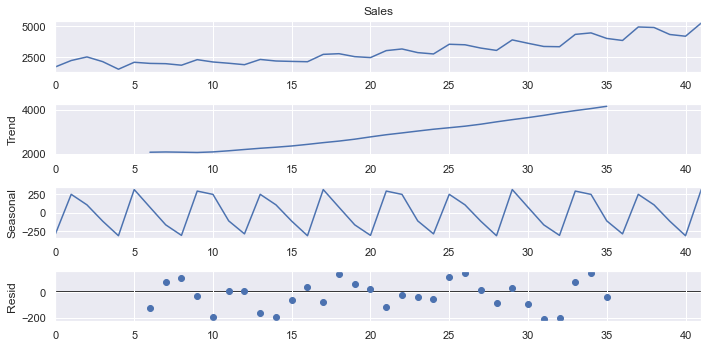

In [108]:
decompose_ts_add = seasonal_decompose(df.Sales, period=12)
decompose_ts_add.plot()
plt.show()

### Different Models 

In [112]:
Train = df.head(28)
Test = df.tail(14)

In [122]:
#Linear Model
linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test["Sales"])-np.array(pred_linear))**2)) 

#Exponential
Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))

#Quadratic 
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))

#Additive seasonality 
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1',"Q2","Q3","Q4"]]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))

#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1',"Q2","Q3","Q4",'t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))

#Multiplicative Seasonality
Mul_sea = smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))

#Multiplicative Additive Seasonality
Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))

rmse_data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(rmse_data)
table_rmse.sort_values(['RMSE_Values'], ascending = True) 

,MODEL,RMSE_Values
5,rmse_Mult_sea,492.577560
6,rmse_Mult_add_sea,492.577560
1,rmse_Exp,588.140510
4,rmse_add_sea_quad,707.796558
0,rmse_linear,750.402069
2,rmse_Quad,783.729798
3,rmse_add_sea,1770.007917


### Multiplicative additive seasonality

### Final Model

In [131]:
Multi_add_sea = smf.ols('log_sales~t+Q1+Q2+Q3+Q4', data=Train).fit()
Multi_add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_sales   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     28.82
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           1.17e-08
Time:                        00:28:39   Log-Likelihood:                 29.388
No. Observations:                  28   AIC:                            -48.78
Df Residuals:                      23   BIC:                            -42.12
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9845      0.029    204.587      0.000       5.924       6.045
t              0.0204      0.002      9.220      0.000       0.016       0.025
Q1             1.3663      0.031     44.143      0.000       1.302       1.430
Q2             1.5846      0.031     50.709      0.000       1.520       1.649
Q3             1.5627      0.032     49.299      0.000       1.497       1.628
Q4             1.4708      0.032     45.546      0.000       1.404       1.538
==============================================================================
Omnibus:                        2.044   Durbin-Watson:                   0.629
Prob(Omnibus):                  0.360   Jarque-Bera (JB):                1.191
Skew:                           0.500   Prob(JB):                        0.551
Kurtosis:                       3.149   Cond. No.                     2.08e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.79e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [137]:
df['forcast'] = pd.DataFrame(np.exp(Multi_add_sea.predict(df)))
df.forcast.head()

0    1589.420548
1    2017.888006
2    2014.718649
3    1875.616681
4    1724.252356
Name: forcast, dtype: float64

<AxesSubplot:xlabel='Year', ylabel='Sales'>

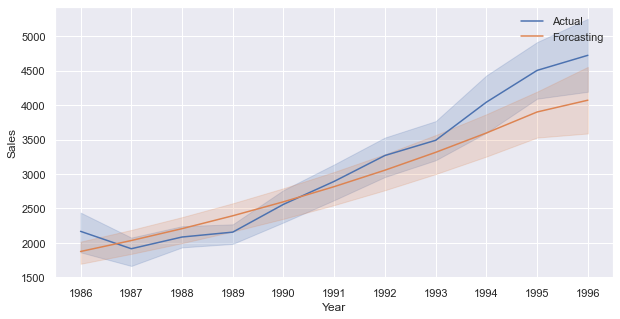

In [143]:
sns.lineplot(x='Year', y ='Sales', data = df, label = 'Actual')
sns.lineplot(x='Year', y='forcast', data = df,label = 'Forcasting')
